In [2]:
import pandas as pd
import torch
import tensorqtl
import numpy as np
from tensorqtl import genotypeio, cis, trans
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import quantile_transform

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
!pwd

/scratch16/abattle4/jpopp/ebQTL/code/trans_qtl_calling


In [57]:
samples_loc = '../../data/trans_qtl_calling/gtex/samples_per_tissue/samples-Nerve_Tibial.txt'
ctprops_loc = '../../data/trans_qtl_calling/gtex/celltype_proportions/celltype_proportions.v8.xCell.7celltypes.txt'
outfile = '../../data/trans_qtl_calling/gtex/celltype_proportions/proportions-Nerve_Tibial.txt'

In [17]:
samples = list(pd.read_csv(samples_loc, header=None, names=['sample'])['sample'])

In [49]:
ctprops = pd.read_csv(ctprops_loc, sep="\t")
ctprops = ctprops[ctprops.columns.intersection(samples).insert(0, 'cell_type')].set_index('cell_type')

In [55]:
donor_ids = ctprops.columns.str.extract(r'([^-]+-[^-]+)').iloc[:, 0].tolist()
ctprops.columns = donor_ids

In [61]:
ctprops.to_csv(outfile, sep="\t")

In [62]:
um = pd.read_csv(outfile, sep="\t")

In [64]:
um.set_index('cell_type')

,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-113IC,GTEX-117YX,GTEX-1192X,GTEX-11DXW,GTEX-11DXX,GTEX-11DXZ,GTEX-11DYG,...,GTEX-ZVZP,GTEX-ZXES,GTEX-ZXG5,GTEX-ZYFC,GTEX-ZYFD,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZZ64
cell_type,,,,,,,,,,,,,,,,,,,,,
Adipocytes,0.1385,0.0019,0.0553,0.1117,0.1960,0.0766,0.0874,0.1440,0.2098,0.0413,...,0.0190,0.0954,0.0066,0.0403,0.1231,0.1822,0.1655,0.0100,0.0000,0.2343
Epithelial_cells,0.0370,0.0577,0.0467,0.0434,0.0593,0.0681,0.0423,0.0730,0.0511,0.0424,...,0.0395,0.0550,0.0379,0.0481,0.0565,0.0539,0.0506,0.0749,0.0428,0.0692
Hepatocytes,0.0000,0.0039,0.0003,0.0022,0.0031,0.0023,0.0000,0.0057,0.0013,0.0004,...,0.0004,0.0000,0.0000,0.0000,0.0046,0.0014,0.0000,0.0015,0.0000,0.0051
Keratinocytes,0.0000,0.0029,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0011,0.0012,0.0000,0.0000,0.0003,0.0000,0.0000,0.0000,0.0000
Myocytes,0.0240,0.1605,0.0169,0.0376,0.0235,0.0119,0.0242,0.0144,0.0416,0.1777,...,0.0123,0.0387,0.0384,0.0451,0.0539,0.0314,0.0371,0.0345,0.0804,0.0105
Neurons,0.0193,0.0185,0.0109,0.0124,0.0094,0.0077,0.0217,0.0109,0.0135,0.0182,...,0.0130,0.0125,0.0277,0.0222,0.0148,0.0087,0.0110,0.0074,0.0127,0.0070
Neutrophils,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0045,0.0000,0.0000,0.0000,0.0000,0.0000,0.0056,0.0000


In [66]:
ctprop_results = pd.read_csv("../../results/trans_qtl_calling/eb_cellid/pseudobulk_tmm/basic/Heart_Left_Ventricle.GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT-variants.celltype-proportions.tsv")

In [74]:
ctprop_results.sort_values(by="b")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
609,609,chr12_123609627_T_C_b38,Adipocytes,0.172837,-0.004227,0.003094,0.154545
602,602,chr12_123609312_T_G_b38,Adipocytes,0.172837,-0.004227,0.003094,0.154545
466,466,chr11_104157161_C_T_b38,Myocytes,0.006773,-0.003718,0.001364,0.248052
410,410,chr7_76274073_A_C_b38,Myocytes,0.078078,-0.003360,0.001901,0.123377
249,249,chr2_190990148_A_G_b38,Myocytes,0.043797,-0.003127,0.001545,0.171018
...,...,...,...,...,...,...,...
637,637,chr15_61224596_A_G_b38,Adipocytes,0.021643,0.005273,0.002285,0.564935
588,588,chr12_123606671_A_G_b38,Adipocytes,0.081074,0.005436,0.003106,0.846859
427,427,chr8_52776686_A_G_b38,Adipocytes,0.012322,0.007127,0.002831,0.802597
434,434,chr8_52778441_A_G_b38,Adipocytes,0.012322,0.007127,0.002831,0.802597


In [72]:
0.05 / (679 / 7)

0.0005154639175257732

## Tissue Dev Cell Type Proportion QTLs

In [3]:
heart_lv = pd.read_csv("/home/jpopp/scratch16-abattle4/jpopp/ebQTL/results/trans_qtl_calling/eb_cellid/pseudobulk_tmm/basic/Artery_Tibial.GOBP_TISSUE_DEVELOPMENT-variants.celltype-proportions.tsv")

In [5]:
heart_lv.sort_values(by="pval")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
630,630,chr5_171387019_C_T_b38,Adipocytes,0.002589,4.778570e-03,0.001578,0.322470
651,651,chr5_171413138_A_G_b38,Adipocytes,0.003549,4.629979e-03,0.001581,0.319897
637,637,chr5_171399320_T_C_b38,Adipocytes,0.004260,4.552893e-03,0.001586,0.319039
828,828,chr12_12674830_T_C_b38,Hepatocytes,0.004640,4.412214e-04,0.000155,0.785592
644,644,chr5_171402344_T_A_b38,Adipocytes,0.005074,4.503143e-03,0.001600,0.316609
...,...,...,...,...,...,...,...
1041,1041,chr18_47967525_G_A_b38,Neurons,0.993080,-9.084678e-07,0.000105,0.460069
756,756,chr7_116268205_A_G_b38,Adipocytes,0.993670,1.702536e-05,0.002145,0.134880
1062,1062,chr20_14360685_A_T_b38,Neurons,0.994284,7.527167e-07,0.000105,0.638937
624,624,chr5_91416306_A_G_b38,Epithelial_cells,0.996256,-7.313725e-06,0.001558,0.234155


Apply Benjamini Hochberg for myocytes?

In [7]:
heart_lv_myo = heart_lv.loc[heart_lv['phenotype_id'] == 'Myocytes']
heart_lv_myo.sort_values(by="pval")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
1012,1012,chr14_22804170_G_C_b38,Myocytes,0.046292,0.002532,0.001267,0.311321
81,81,chr2_28362941_C_T_b38,Myocytes,0.053484,-0.002357,0.001218,0.443299
767,767,chr8_11675875_A_G_b38,Myocytes,0.057319,-0.002447,0.001284,0.704467
326,326,chr2_215433152_G_A_b38,Myocytes,0.057672,0.002661,0.001399,0.230703
347,347,chr2_215433929_C_T_b38,Myocytes,0.057672,0.002661,0.001399,0.230703
...,...,...,...,...,...,...,...
396,396,chr3_122181013_C_T_b38,Myocytes,0.864373,-0.000270,0.001578,0.190722
67,67,chr1_156523135_A_C_b38,Myocytes,0.910567,0.000139,0.001236,0.621343
620,620,chr5_91375457_A_T_b38,Myocytes,0.949990,-0.000100,0.001597,0.236615
382,382,chr3_122170358_G_A_b38,Myocytes,0.964492,0.000054,0.001208,0.396730


In [8]:
from statsmodels.stats.multitest import multipletests

In [9]:
multipletests(heart_lv_myo['pval'], alpha=0.1, method='fdr_bh', maxiter=1, is_sorted=False, returnsorted=False)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

### Tibial Artery

In [10]:
heart_lv = pd.read_csv("/home/jpopp/scratch16-abattle4/jpopp/ebQTL/results/trans_qtl_calling/eb_cellid/pseudobulk_tmm/basic/Heart_Left_Ventricle.GOBP_TISSUE_DEVELOPMENT-variants.celltype-proportions.tsv")

In [15]:
heart_lv.sort_values(by="pval")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
825,825,chr12_12674830_T_C_b38,Neutrophils,0.001008,-2.431367e-03,0.000732,0.785714
958,958,chr12_123606913_G_A_b38,Neutrophils,0.001830,2.511274e-03,0.000799,0.845455
895,895,chr12_123602451_C_G_b38,Neutrophils,0.001830,2.511274e-03,0.000799,0.845455
923,923,chr12_123605035_A_T_b38,Neutrophils,0.001830,2.511274e-03,0.000799,0.845455
937,937,chr12_123605661_G_C_b38,Neutrophils,0.001830,2.511274e-03,0.000799,0.845455
...,...,...,...,...,...,...,...
329,329,chr2_215433361_G_A_b38,Adipocytes,0.995550,1.526274e-05,0.002735,0.214844
650,650,chr5_171402344_T_A_b38,Neutrophils,0.996050,3.189381e-06,0.000644,0.330287
87,87,chr2_175120471_T_A_b38,Keratinocytes,0.996992,9.796082e-07,0.000260,0.184282
101,101,chr2_175124820_G_A_b38,Keratinocytes,0.997674,7.433316e-07,0.000255,0.811671


In [11]:
heart_lv_myo = heart_lv.loc[heart_lv['phenotype_id'] == 'Myocytes']
heart_lv_myo.sort_values(by="pval")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
816,816,chr11_104157161_C_T_b38,Myocytes,0.006773,-0.003718,0.001364,0.248052
375,375,chr2_215441130_C_T_b38,Myocytes,0.040675,-0.002909,0.001415,0.217452
830,830,chr12_48028448_A_G_b38,Myocytes,0.042982,0.002675,0.001316,0.231771
837,837,chr12_48028706_G_A_b38,Myocytes,0.043139,0.002667,0.001313,0.232468
291,291,chr2_190990148_A_G_b38,Myocytes,0.043797,-0.003127,0.001545,0.171018
...,...,...,...,...,...,...,...
844,844,chr12_56074922_A_T_b38,Myocytes,0.969674,0.000046,0.001210,0.625000
403,403,chr3_122183174_A_G_b38,Myocytes,0.973921,-0.000050,0.001538,0.194444
557,557,chr3_122203948_C_T_b38,Myocytes,0.976230,0.000045,0.001493,0.184896
515,515,chr3_122201579_G_A_b38,Myocytes,0.979210,0.000038,0.001474,0.192708


In [12]:
multipletests(heart_lv_myo['pval'], alpha=0.1, method='fdr_bh', maxiter=1, is_sorted=False, returnsorted=False)

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [16]:
heart_lv_epi = heart_lv.loc[heart_lv['phenotype_id'] == 'Epithelial_cells']
heart_lv_epi.sort_values(by="pval")

,Unnamed: 0,variant_id,phenotype_id,pval,b,b_se,af
589,589,chr5_91335567_C_T_b38,Epithelial_cells,0.034729,0.001585,0.000747,0.319010
1,1,chr1_9919625_C_T_b38,Epithelial_cells,0.035251,0.002032,0.000961,0.832468
603,603,chr5_91337255_A_G_b38,Epithelial_cells,0.040689,0.001531,0.000745,0.320210
8,8,chr1_9932244_A_C_b38,Epithelial_cells,0.041426,0.001966,0.000960,0.833333
596,596,chr5_91336808_C_A_b38,Epithelial_cells,0.045558,0.001499,0.000747,0.319010
...,...,...,...,...,...,...,...
344,344,chr2_215433929_C_T_b38,Epithelial_cells,0.955111,0.000047,0.000838,0.215584
295,295,chr2_215430558_G_A_b38,Epithelial_cells,0.955111,0.000047,0.000838,0.215584
771,771,chr10_8088827_C_A_b38,Epithelial_cells,0.956737,0.000039,0.000712,0.512987
554,554,chr3_122203948_C_T_b38,Epithelial_cells,0.967339,0.000037,0.000897,0.184896


<Axes: xlabel='pval', ylabel='Count'>

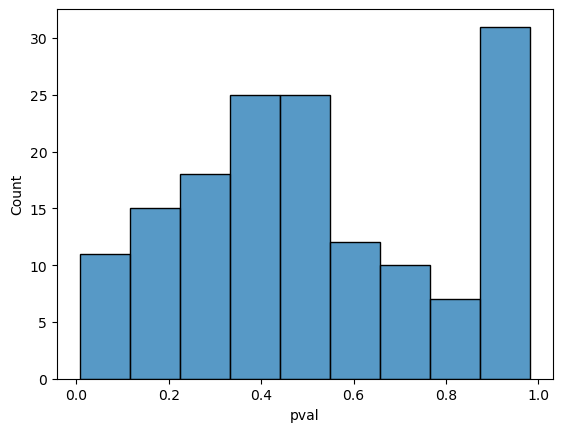

In [19]:
sns.histplot(heart_lv_myo['pval'])

<Axes: xlabel='af', ylabel='Count'>

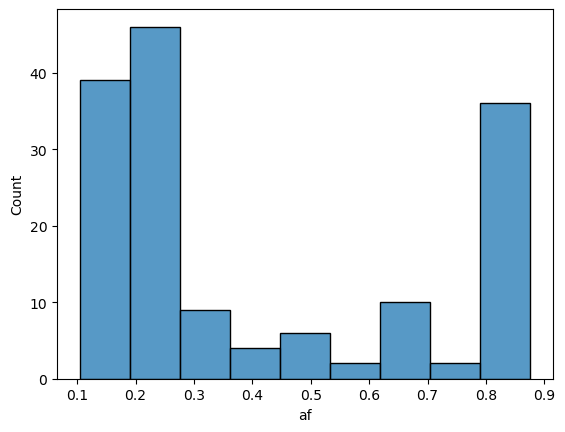

In [23]:
sns.histplot(heart_lv_myo['af'])

<Axes: xlabel='pval', ylabel='Count'>

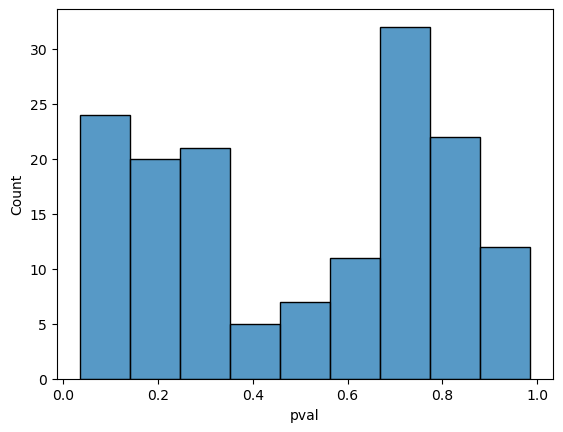

In [20]:
sns.histplot(heart_lv_epi['pval'])

Look at distribution of cell type proportion across donors

In [3]:
artery_proportions = pd.read_csv("/home/jpopp/scratch16-abattle4/jpopp/ebQTL/data/trans_qtl_calling/gtex/celltype_proportions/proportions-Artery_Tibial.txt", sep="\t").set_index('cell_type')

In [20]:
artery_proportions_norm = quantile_transform(artery_proportions, axis=1, output_distribution='normal')

/home/jpopp/.conda/envs/tensorqtl/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (662). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: xlabel='Myocytes', ylabel='Count'>

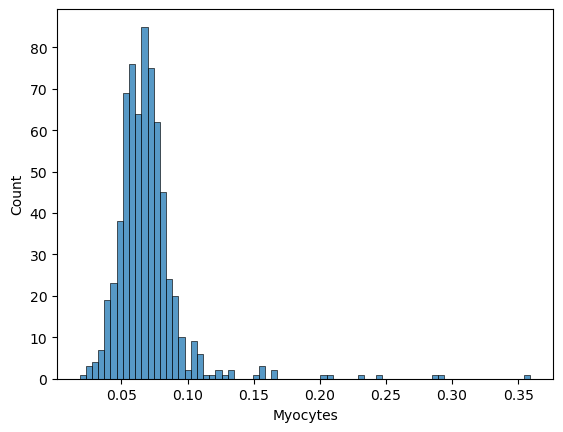

In [21]:
sns.histplot(artery_proportions.loc['Myocytes'])

In [22]:
artery_proportions_norm = pd.DataFrame(artery_proportions_norm, index=artery_proportions.index, columns=artery_proportions.columns)

<Axes: xlabel='Myocytes', ylabel='Count'>

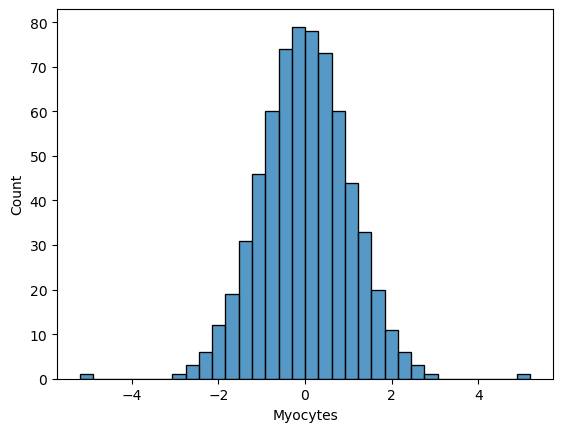

In [23]:
sns.histplot(artery_proportions_norm.loc['Myocytes'])

<Axes: xlabel='Epithelial_cells', ylabel='Count'>

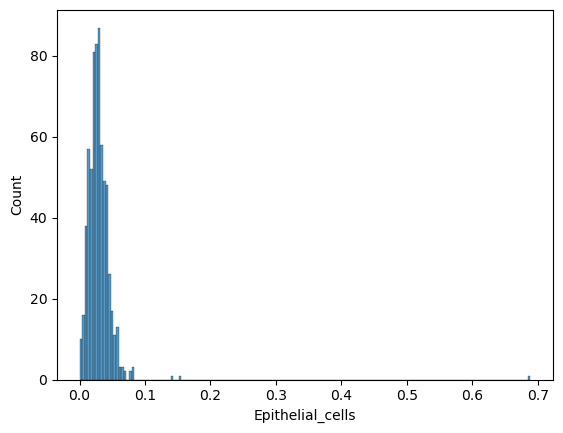

In [24]:
sns.histplot(artery_proportions.loc['Epithelial_cells'])

<Axes: xlabel='Epithelial_cells', ylabel='Count'>

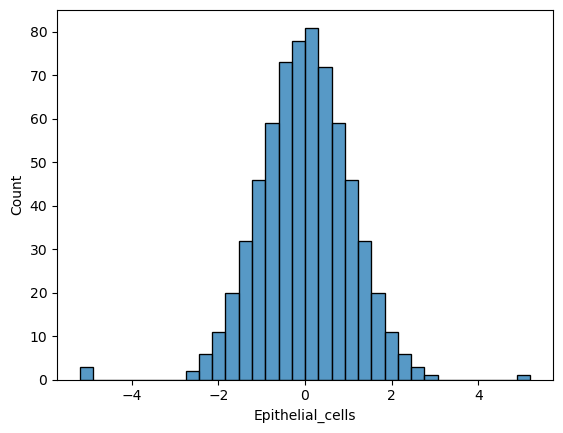

In [25]:
sns.histplot(artery_proportions_norm.loc['Epithelial_cells'])

Get permutation p-values for each locus

In [3]:
variant_info = pd.read_csv("../../results/static_eqtl_followup/eb_cellid/pseudobulk_tmm/basic/8pcs/trans_eqtl_variant_candidate_info.GOBP_TISSUE_DEVELOPMENT.Artery_Tibial.tsv", sep="\t")

In [6]:
ctprop_results = pd.read_csv("../../results/trans_qtl_calling/eb_cellid/pseudobulk_tmm/basic/all-celltype-proportions/GOBP_TISSUE_DEVELOPMENT-variants.gtex_all_tissues.tsv", sep="\t")

In [7]:
ctprop_results

,variant_id,phenotype_id,pval,b,b_se,tissue
0,chr1_9919625_C_T_b38,Adipocytes,0.126302,0.050938,0.033263,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...
1,chr1_9919625_C_T_b38,Epithelial_cells,0.014138,0.118622,0.048177,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...
2,chr1_9919625_C_T_b38,Hepatocytes,0.561872,-0.046050,0.079336,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...
3,chr1_9919625_C_T_b38,Keratinocytes,0.223667,-0.242148,0.198757,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...
4,chr1_9919625_C_T_b38,Myocytes,0.503778,0.082749,0.123684,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...
...,...,...,...,...,...,...
51766,chr22_46572159_T_C_b38,Hepatocytes,0.315012,-0.141899,0.141109,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...
51767,chr22_46572159_T_C_b38,Keratinocytes,0.256250,0.087907,0.077357,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...
51768,chr22_46572159_T_C_b38,Myocytes,0.117540,-0.083221,0.053094,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...
51769,chr22_46572159_T_C_b38,Neurons,0.147245,0.200882,0.138424,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...


I want to assign each variant to a locus

In [10]:
ctprop_results = ctprop_results.merge(variant_info, how="left", on="variant_id")

In [19]:
ctprop_results.groupby(['phenotype_id', 'tissue', 'phenotype_id_ensg']).pval.idxmin().values

array([  413,   854,  1064, ..., 51686, 51567, 51371])

In [20]:
top_results = ctprop_results.loc[ctprop_results.groupby(['phenotype_id', 'tissue', 'phenotype_id_ensg']).pval.idxmin().values]
top_results

,variant_id,phenotype_id,pval,b,b_se,tissue,phenotype_id_ensg,MAF,dist2tss,group
413,chr3_122185364_G_T_b38,Adipocytes,0.253271,0.037335,0.032643,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...,ENSG00000036828,0.170669,1681,pathway_novel
854,chr12_56080696_A_G_b38,Adipocytes,0.782240,0.006995,0.025294,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...,ENSG00000065361,0.347341,3897,pathway_novel
1064,chr22_46543361_T_C_b38,Adipocytes,0.641205,0.011734,0.025164,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...,ENSG00000075275,0.499139,6191,pathway_novel
77,chr2_28362941_C_T_b38,Adipocytes,0.703899,-0.009216,0.024234,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...,ENSG00000075426,0.443299,29507,pathway_novel
882,chr12_123587218_C_A_b38,Adipocytes,0.415103,0.030008,0.036792,Adipose_Subcutaneous.GOBP_TISSUE_DEVELOPMENT-v...,ENSG00000086598,0.130584,2685,pathway_novel
...,...,...,...,...,...,...,...,...,...,...
50699,chr1_9919625_C_T_b38,Neutrophils,0.373086,0.019482,0.021856,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...,ENSG00000178585,0.181271,9289,pathway_novel
50762,chr1_156523135_A_C_b38,Neutrophils,0.142402,-0.024416,0.016623,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...,ENSG00000183856,0.378657,49469,pathway_novel
51686,chr13_113597133_T_G_b38,Neutrophils,0.440643,-0.012517,0.016222,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...,ENSG00000198176,0.365352,12412,pathway_novel
51567,chr12_110645279_G_T_b38,Neutrophils,0.884243,-0.002825,0.019397,Whole_Blood.GOBP_TISSUE_DEVELOPMENT-variants.c...,ENSG00000204852,0.189537,31252,pathway_novel


In [24]:
pr = genotypeio.PlinkReader("../../data/trans_qtl_calling/gtex/genotypes_filtered/plink.Artery_Tibial.GOBP_TISSUE_DEVELOPMENT")
genotype_df = pr.load_genotypes()


Mapping files: 100%|██████████| 3/3 [00:00<00:00, 46.98it/s]


In [25]:
genotype_df

iid,GTEX-111FC,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-113IC,GTEX-117YW,GTEX-117YX,GTEX-11DXX,GTEX-11DXZ,GTEX-11EI6,...,GTEX-ZVZP,GTEX-ZXG5,GTEX-ZY6K,GTEX-ZYFC,GTEX-ZYFD,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZZ64,GTEX-ZZPU
snp,,,,,,,,,,,,,,,,,,,,,
chr1_9919625_C_T_b38,2,2,2,2,1,2,2,2,0,2,...,2,2,1,1,1,2,1,1,2,2
chr1_9932244_A_C_b38,2,2,2,2,1,2,2,2,0,2,...,2,2,1,1,1,2,1,1,2,2
chr1_9934281_A_G_b38,2,2,2,2,1,2,2,2,0,-1,...,2,2,1,1,1,2,1,1,2,2
chr1_9940342_T_A_b38,2,2,2,2,1,2,2,2,0,2,...,2,2,1,1,1,2,1,1,2,2
chr1_9944824_C_T_b38,2,2,2,2,1,2,2,2,0,2,...,2,2,1,1,1,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr20_14358157_G_T_b38,1,2,0,0,1,2,1,1,0,1,...,2,2,0,1,2,2,1,1,2,1
chr20_14360685_A_T_b38,1,2,0,0,1,2,1,1,0,1,...,2,2,0,1,2,2,1,1,2,1
chr22_36992814_G_A_b38,1,0,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0


In [28]:
genotype_df.loc[top_results['variant_id']]

KeyError: "['chr22_38500950_G_A_b38', 'chr22_38511844_C_T_b38'] not in index"

In [22]:
0.05 / (51771 / 12066)

0.011653242162600686